# Exploring Additional Data in Predicting Molecular Properties

In this competition we are asked to **predict magnetic interactions between a pair of atoms**. As we all know, literally everything is made of atoms. So if we could get deeper insight into the structure and dynamics of molecules, that could advance many fields of science including environmental science, pharmaceutical science, and materials science. 

I like this kind of science competition, as I can defintely gain a reward. Winning a kaggle competition is wonderful, but getting to know a new field of science is surely another reward regardless of your final result may be.

Here I explore **the additional data, which are consisted of 5 csv files (dipole_moments.csv, magnetic_shielding_tensors.csv, mulliken_charges.csv, potential_energy.csv, scalar_coupling_contributions.csv)**. They are provided only for training data, so these infomration may not be super useful for our predictions. But those data are given. Why don't we explore what they are? At least we can learn new things and potentially get better understandings about training & test data! 

I am not a chemist or anything, so your feedbacks are very welcome:D

## Files

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['potential_energy.csv', 'mulliken_charges.csv', 'train.csv', 'scalar_coupling_contributions.csv', 'sample_submission.csv', 'structures', 'test.csv', 'magnetic_shielding_tensors.csv', 'dipole_moments.csv', 'structures.csv']


## Libraries

In [2]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy import stats
import gc
import warnings
warnings.filterwarnings("ignore")

print("Libraries were loaded.")

Libraries were loaded.


## Loading data

In [3]:
# load data
train_df = pd.read_csv('../input/train.csv')
potential_energy_df = pd.read_csv('../input/potential_energy.csv')
mulliken_charges_df = pd.read_csv('../input/mulliken_charges.csv')
scalar_coupling_contributions_df = pd.read_csv('../input/scalar_coupling_contributions.csv')
magnetic_shielding_tensors_df = pd.read_csv('../input/magnetic_shielding_tensors.csv')
dipole_moments_df = pd.read_csv('../input/dipole_moments.csv')
structure_df = pd.read_csv('../input/structures.csv')
test_df = pd.read_csv('../input/test.csv')


print("All the data were loaded.")

All the data were loaded.


## Basic information about each file
What does each file look like?

In [4]:
# What are inside those files?
dfs = [train_df, potential_energy_df, mulliken_charges_df, 
       scalar_coupling_contributions_df, magnetic_shielding_tensors_df, 
       dipole_moments_df, structure_df, test_df]
names = ["train_df", "potential_energy_df", "mulliken_charges_df", 
       "scalar_coupling_contributions_df", "magnetic_shielding_tensors_df", 
       "dipole_moments_df", "structure_df", "test_df"]

# display info about a DataFrame
def dispDF(df, name):
    print("========== " + name + " ==========")
    print("SHAPE ----------------------")
    print(df.shape)
    print('')
    print("HEAD ----------------------")
    print(df.head(5))
    print('')
    print("DATA TYPE ----------------")
    print(df.dtypes)
    print('')
    print("UNIQUES -------------------")
    print(df.nunique())
    print('')
    print("======================================")

pd.set_option('display.expand_frame_repr', False)
for df, name in zip(dfs, names):
    dispDF(df, name)

========== train_df ==========
SHAPE ----------------------
(4658147, 6)

HEAD ----------------------
   id     molecule_name  atom_index_0  atom_index_1  type  scalar_coupling_constant
0   0  dsgdb9nsd_000001             1             0  1JHC                   84.8076
1   1  dsgdb9nsd_000001             1             2  2JHH                  -11.2570
2   2  dsgdb9nsd_000001             1             3  2JHH                  -11.2548
3   3  dsgdb9nsd_000001             1             4  2JHH                  -11.2543
4   4  dsgdb9nsd_000001             2             0  1JHC                   84.8074

DATA TYPE ----------------
id                            int64
molecule_name                object
atom_index_0                  int64
atom_index_1                  int64
type                         object
scalar_coupling_constant    float64
dtype: object

UNIQUES -------------------
id                          4658147
molecule_name                 85003
atom_index_0                     29

Now we look at each file one by one:) I try to visualize the content of each file.

In [5]:
# colors
colors = sns.color_palette("cubehelix", 8)
sns.set()

subsample = 100

# Dipole moments

### What are the dipole moments?
Dipole moments quantify **a separation of charge between atoms**. 

When a pair of different atoms forms an ionic bond or a covalent bond, an atom with the stronger **electronegativity (F > O > Cl > N > Br > I > S > C > H > metals)** pulls shared electrons away from the other. For example, in CO2, O has stronger electronegativity than C. That means that O pulls electrons from C, generating the dipole moments between a pair of the two atoms. 

However, CO2 as a molecule itself does not have dipole moments because in its structure (O = C = O), Os pull electrons away from C equally but in the opposite direction, which leads to overall zero separation of charge between atoms.

H2O is another story. Unlike CO2, H2O has the asymmetric structure. Therefore, although O pulls electrons from Hs, a separation of charge still remains.

![](https://i.ibb.co/4YJbS0Z/dipole-Moments.png)

Reference:
- CHEMISTRY LibreTexts: Dipole Moments
https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Physical_Properties_of_Matter/Atomic_and_Molecular_Properties/Dipole_Moments

- CHEMISTRY LibreTexts: Electronegativity
https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Physical_Properties_of_Matter/Atomic_and_Molecular_Properties/Electronegativity

Let's see how contents of the file look like.

### File description
> dipole_moments.csv - contains the molecular electric dipole moments. These are three dimensional vectors that indicate the charge distribution in the molecule. The first column (molecule_name) are the names of the molecule, the second to fourth column are the X, Y and Z components respectively of the dipole moment.


In [6]:
# display info about the data frame
dispDF(dipole_moments_df, "dipole moments")

========== dipole moments ==========
SHAPE ----------------------
(85003, 4)

HEAD ----------------------
      molecule_name       X    Y       Z
0  dsgdb9nsd_000001  0.0000  0.0  0.0000
1  dsgdb9nsd_000002 -0.0002  0.0  1.6256
2  dsgdb9nsd_000003  0.0000  0.0 -1.8511
3  dsgdb9nsd_000005  0.0000  0.0 -2.8937
4  dsgdb9nsd_000007  0.0000  0.0  0.0000

DATA TYPE ----------------
molecule_name     object
X                float64
Y                float64
Z                float64
dtype: object

UNIQUES -------------------
molecule_name    85003
X                52494
Y                46825
Z                34847
dtype: int64



Let's look at the charge distribution. Note that I sampled data to reduce the computational burden.

Text(0.5, 0.92, 'Dipole Moment')

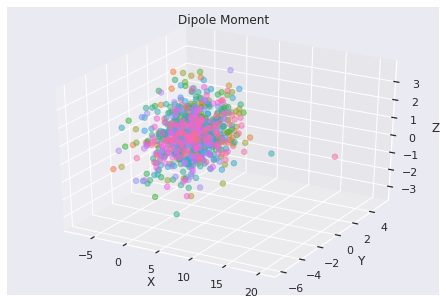

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
# ax = fig.add_subplot(111, projection='3d')

scatter_colors = sns.color_palette("husl", 85003)

# 3D scatter
ax.scatter(dipole_moments_df['X'][::subsample], dipole_moments_df['Y'][::subsample],
           dipole_moments_df['Z'][::subsample], s=30, alpha=0.5, c=scatter_colors[::subsample])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Dipole Moment')

Each molecule has a different color. There seems to be no cluster or anything, but we can find some outliers.

Here is a histogram of the distances of molecules in this space.

Text(0.5, 0, 'log distance')

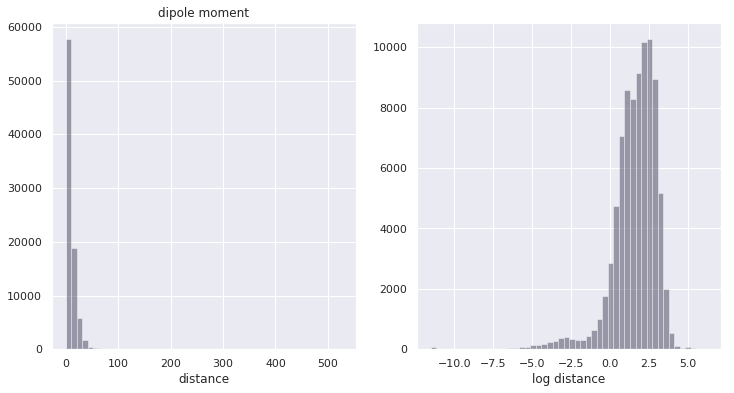

In [8]:
dipole_moments_df['dm_distance'] = np.asarray([x**2 + y**2 + z**2 for x, y, z in zip(dipole_moments_df['X'],dipole_moments_df['Y'], dipole_moments_df['Z'])])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax = ax.flatten()

# original distribution
sns.distplot(dipole_moments_df['dm_distance'], color=colors[0], kde=False, norm_hist=False, ax=ax[0])
ax[0].set_xlabel('distance')
ax[0].set_title('dipole moment')

# in log
sns.distplot(np.log(dipole_moments_df['dm_distance'] + 0.00001), color=colors[0], kde=False, norm_hist=False, ax=ax[1])
ax[1].set_xlabel('log distance')

As you see, the original histogram (left) is highly right-scewed. Hence it becomes approximately normal after the log-transform (right).

Maybe it is worthwhile making a list of "outlier" molecules in terms of the distance in the dipole-moment-space. Here I set the threshold to be 100. This list may be useful for our predictions.

In [9]:
dipole_moments_df['dm_outliers'] = np.zeros(dipole_moments_df.shape[0]).astype(int)
dipole_moments_df.loc[dipole_moments_df['dm_distance'] > 100, 'dm_outliers'] = int(1)
print("outliers (dipole moments): " + str(np.sum(dipole_moments_df['dm_outliers'] == 1)) + " molecules")
dipole_moments_df.head(7)

outliers (dipole moments): 169 molecules


,molecule_name,X,Y,Z,dm_distance,dm_outliers
0,dsgdb9nsd_000001,0.0000,0.0000,0.0000,0.000000,0
1,dsgdb9nsd_000002,-0.0002,0.0000,1.6256,2.642575,0
2,dsgdb9nsd_000003,0.0000,0.0000,-1.8511,3.426571,0
3,dsgdb9nsd_000005,0.0000,0.0000,-2.8937,8.373500,0
4,dsgdb9nsd_000007,0.0000,0.0000,0.0000,0.000000,0
5,dsgdb9nsd_000008,0.6506,-1.3801,-0.0002,2.327956,0
6,dsgdb9nsd_000009,0.7156,0.0004,-0.0004,0.512084,0


# Magnetic shielding tensors
### What are the magnetic shielding tensors?
Magnetic shielding tensors describe the magnetic field surrounding the nucleus.

The **NMR (Nuclear Magnetic Resonance)** puts a strong magnetic field upon the molecule. Since the electrons orbit the nucleus (which by the way consists of neutrons and protons), they slightly influence with so-called shielding, or how the external magnetic alters the energy levels of charged particles. 

As the dynamics of theses electrons are influenced by other atoms due to electronegativity, the shielding is inevitably influenced by the local structure or composition of atoms in the molecule. In other words, we can estimate them by NMR. **The magnetic shielding tensors are resulting 3-by-3 tensor (matrix) to represent the measured magnetic field surrounding the nucleus**.

![](https://i.ibb.co/k00CK8g/PCA-tensors.png)

Here the red solid lines indicate the principal components of the shift tensor (σxx, σyy, σzz). Connecting these principal components results in the black ellipses, which represents the electron field surrounding the nucleus.

Reference:
- CHEMISTRY LibreTexts: Chemical Shift (Shielding)
https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Spectroscopy/Magnetic_Resonance_Spectroscopies/Nuclear_Magnetic_Resonance/NMR%3A_Theory/NMR_Interactions/Chemical_Shift_(Shielding)

### Data description
> magnetic_shielding_tensors.csv - contains the magnetic shielding tensors for all atoms in the molecules. The first column (molecule_name) contains the molecule name, the second column (atom_index) contains the index of the atom in the molecule, the third to eleventh columns contain the XX, YX, ZX, XY, YY, ZY, XZ, YZ and ZZ elements of the tensor/matrix respectively.

In [10]:
# display info about the data frame
dispDF(magnetic_shielding_tensors_df, "magnetic shielding tensors")

========== magnetic shielding tensors ==========
SHAPE ----------------------
(1533537, 11)

HEAD ----------------------
      molecule_name  atom_index        XX      YX      ZX      XY        YY      ZY      XZ      YZ        ZZ
0  dsgdb9nsd_000001           0  195.3150  0.0000 -0.0001  0.0000  195.3170  0.0007 -0.0001  0.0007  195.3170
1  dsgdb9nsd_000001           1   31.3410 -1.2317  4.0544 -1.2317   28.9546 -1.7173  4.0546 -1.7173   34.0861
2  dsgdb9nsd_000001           2   31.5814  1.2173 -4.1474  1.2173   28.9036 -1.6036 -4.1476 -1.6036   33.8967
3  dsgdb9nsd_000001           3   31.5172  4.1086  1.2723  4.1088   33.9068  1.6950  1.2724  1.6951   28.9579
4  dsgdb9nsd_000001           4   31.4029 -4.0942 -1.1793 -4.0944   34.0776  1.6259 -1.1795  1.6260   28.9013

DATA TYPE ----------------
molecule_name     object
atom_index         int64
XX               float64
YX               float64
ZX               float64
XY               float64
YY               float64
ZY              

This file stores the 3-by-3 matrix (tensor). I only use the principal components (XX, YY, and ZZ) to visualize their distributions.

Text(0.5, 0.92, 'Magnetic shielding tensors')

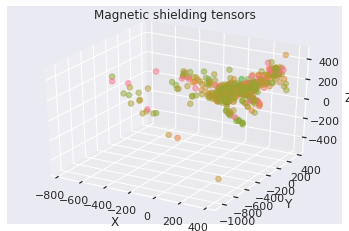

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter_colors = sns.color_palette("husl", 29)

# 3D scatter
for i in range(29):
    xx = magnetic_shielding_tensors_df.loc[magnetic_shielding_tensors_df['atom_index']==i, 'XX']
    yy = magnetic_shielding_tensors_df.loc[magnetic_shielding_tensors_df['atom_index']==i, 'YY']
    zz = magnetic_shielding_tensors_df.loc[magnetic_shielding_tensors_df['atom_index']==i, 'ZZ']
    ax.scatter(xx[::subsample*10], yy[::subsample*10], zz[::subsample*10], s=30, alpha=0.5, c=scatter_colors[i])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Magnetic shielding tensors')

It is hard to see but there are 29 colors representing the 29 unique atom index. Are there ... clusters? I mean, small (left side) and big (right side) ones?

# Potential energy
### What is the potential energy?
Potential energy is relatively easy to understand in the physics. It is **the energy held by an object relative to others**. For example, in the figure below, you can easily imagine what would happen if the string was released. The elastic potential energy of the bow is then transformed into kinetic energy.

![](https://i.ibb.co/Y39t4xx/2019-06-24-12-35-28.png)

This example is essentially similar to the case with molecules. Atoms form a certain bond (e.g. ionic) to be a molecule such that the overall energy becomes lower (more stable). In other words, **the bonds between atoms have potential energy, which is converted into kinetic energy once the bonds are broken**.

Reference:
- CHEMISTRY LibreTexts: Potential energy https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Thermodynamics/Energies_and_Potentials/Potential_Energy
- [Wikipedia: Potential energy](https://en.wikipedia.org/wiki/Potential_energy)

> potential_energy.csv - contains the potential energy of the molecules. The first column (molecule_name) contains the name of the molecule, the second column (potential_energy) contains the potential energy of the molecule.

In [12]:
# display info about the data frame
dispDF(potential_energy_df, "potential energy")

========== potential energy ==========
SHAPE ----------------------
(85003, 2)

HEAD ----------------------
      molecule_name  potential_energy
0  dsgdb9nsd_000001         -40.52368
1  dsgdb9nsd_000002         -56.56025
2  dsgdb9nsd_000003         -76.42608
3  dsgdb9nsd_000005         -93.42849
4  dsgdb9nsd_000007         -79.83869

DATA TYPE ----------------
molecule_name        object
potential_energy    float64
dtype: object

UNIQUES -------------------
molecule_name       85003
potential_energy    54596
dtype: int64



Text(-386.9217, 15000, 'median = -416.9217')

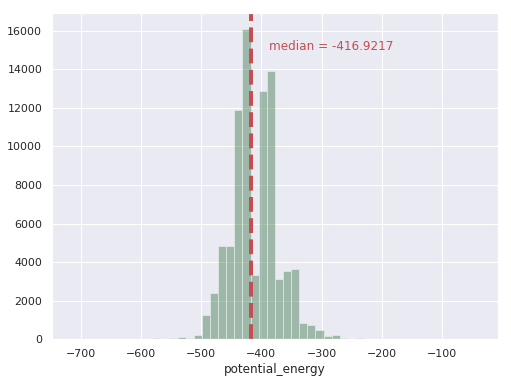

In [13]:
# potential energy
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# histogram
sns.distplot(potential_energy_df['potential_energy'], 
             kde=False, color=colors[2], ax=ax)

# median
pe_median = potential_energy_df['potential_energy'].median()
ax.axvline(pe_median, color='r', linestyle='--', lw=4)
ax.text(pe_median + 30, 15000, 'median = ' + str(pe_median), fontsize=12, color='r') 

We can see that molecules are bimodally distributed with respect to the potential energy. Let's use the median split to have two clusters.

In [14]:
# median split
highPE_molecules = potential_energy_df.loc[potential_energy_df['potential_energy'] >= pe_median]
lowPE_molecules = potential_energy_df.loc[potential_energy_df['potential_energy'] < pe_median]

In [15]:
print(str(highPE_molecules.shape[0]) + " high potential energy molecules:")
highPE_molecules.head(7)

42504 high potential energy molecules:


,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.52368
1,dsgdb9nsd_000002,-56.56025
2,dsgdb9nsd_000003,-76.42608
3,dsgdb9nsd_000005,-93.42849
4,dsgdb9nsd_000007,-79.83869
5,dsgdb9nsd_000008,-115.73030
6,dsgdb9nsd_000009,-116.66500


In [16]:
print(str(lowPE_molecules.shape[0]) + " low potential energy molecules:")
lowPE_molecules.head(7)

42499 low potential energy molecules:


,molecule_name,potential_energy
471,dsgdb9nsd_000798,-417.1161
487,dsgdb9nsd_000828,-451.5622
488,dsgdb9nsd_000830,-452.7851
2488,dsgdb9nsd_003946,-432.4453
2502,dsgdb9nsd_003968,-430.6701
2515,dsgdb9nsd_003985,-417.1762
2516,dsgdb9nsd_003986,-417.1410


In [17]:
# low (0) and high (0) potential energy
potential_energy_df['energy_class'] = np.zeros(potential_energy_df.shape[0]).astype(int)
potential_energy_df.loc[potential_energy_df['potential_energy'] >= pe_median, 'energy_class'] = int(1)
potential_energy_df.head(7)

,molecule_name,potential_energy,energy_class
0,dsgdb9nsd_000001,-40.52368,1
1,dsgdb9nsd_000002,-56.56025,1
2,dsgdb9nsd_000003,-76.42608,1
3,dsgdb9nsd_000005,-93.42849,1
4,dsgdb9nsd_000007,-79.83869,1
5,dsgdb9nsd_000008,-115.73030,1
6,dsgdb9nsd_000009,-116.66500,1


# Mulliken charges
### What are the Mulliken charges?
The Mulliken charges characterize **the electric charge distribution in a molecule**. 

A molecular orbital consists of multiple atomic orbitals, so we can estimate the electric charge distribution by a linear combination of these oribitals. The Mulliken charge is assigned to each atom as the sum of the linear terms over all the orbitals that belong to the atom.

![](https://i.ibb.co/PwvdC2w/mulliken.png)

Here net Mulliken charge distribution on H, C and N atoms in histidines are shown as an example (Alia et al., 2004).

Reference
- [Mulliken population analysis](https://en.wikipedia.org/wiki/Mulliken_population_analysis)
- [Alia et al (2004) Heteronuclear 2D ( 1 H- 13 C) MAS NMR Resolves the Electronic Structure of Coordinated Histidines in Light-Harvesting Complex II: Assessment of Charge Transfer and Electronic Delocalization Effect](https://www.researchgate.net/publication/8893081_Heteronuclear_2D_1_H-_13_C_MAS_NMR_Resolves_the_Electronic_Structure_of_Coordinated_Histidines_in_Light-Harvesting_Complex_II_Assessment_of_Charge_Transfer_and_Electronic_Delocalization_Effect)

### Data description
> mulliken_charges.csv - contains the mulliken charges for all atoms in the molecules. The first column (molecule_name) contains the name of the molecule, the second column (atom_index) contains the index of the atom in the molecule, the third column (mulliken_charge) contains the mulliken charge of the atom.

In [18]:
# display info about the data frame
dispDF(mulliken_charges_df, "mulliken charges")

========== mulliken charges ==========
SHAPE ----------------------
(1533537, 3)

HEAD ----------------------
      molecule_name  atom_index  mulliken_charge
0  dsgdb9nsd_000001           0        -0.535689
1  dsgdb9nsd_000001           1         0.133921
2  dsgdb9nsd_000001           2         0.133922
3  dsgdb9nsd_000001           3         0.133923
4  dsgdb9nsd_000001           4         0.133923

DATA TYPE ----------------
molecule_name       object
atom_index           int64
mulliken_charge    float64
dtype: object

UNIQUES -------------------
molecule_name       85003
atom_index             29
mulliken_charge    599131
dtype: int64



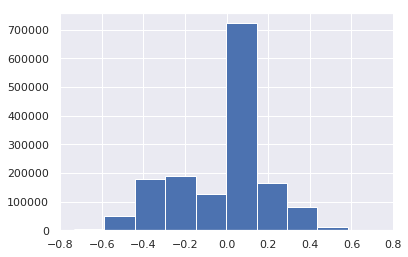

In [19]:
# distribution of mulliken_charge
mulliken_charges_df["mulliken_charge"].hist()

Mulliken charges seems to be slightly above 0 in many cases.

# Structure
This structure.csv is served for us to visualize molecules in 3D (e.g. [How To: Easy Visualization of Molecules.](https://www.kaggle.com/borisdee/how-to-easy-visualization-of-molecules)). I wonder if this file can be useful beyound the visualization.

### Data description
> structure.zip - folder containing molecular structure (xyz) files, where the first line is the number of atoms in the molecule, followed by a blank line, and then a line for every atom, where the first column contains the atomic element (H for hydrogen, C for carbon etc.) and the remaining columns contain the X, Y and Z cartesian coordinates (a standard format for chemists and molecular visualization programs).

In [20]:
# display info about the data frame
dispDF(structure_df, "structure")

========== structure ==========
SHAPE ----------------------
(2358657, 6)

HEAD ----------------------
      molecule_name  atom_index atom         x         y         z
0  dsgdb9nsd_000001           0    C -0.012698  1.085804  0.008001
1  dsgdb9nsd_000001           1    H  0.002150 -0.006031  0.001976
2  dsgdb9nsd_000001           2    H  1.011731  1.463751  0.000277
3  dsgdb9nsd_000001           3    H -0.540815  1.447527 -0.876644
4  dsgdb9nsd_000001           4    H -0.523814  1.437933  0.906397

DATA TYPE ----------------
molecule_name     object
atom_index         int64
atom              object
x                float64
y                float64
z                float64
dtype: object

UNIQUES -------------------
molecule_name     130775
atom_index            29
atom                   5
x                2358441
y                2358364
z                2358421
dtype: int64



In [21]:
# # Let's visualize one molecule anyway
# !pip install ase

In [22]:
# import ase
# from ase import Atoms
# import ase.visualize

# positions = structure_df.loc[structure_df['molecule_name'] == 'dsgdb9nsd_000001', ['x', 'y', 'z']]
# symbols = structure_df.loc[structure_df['molecule_name'] == 'dsgdb9nsd_000001', 'atom']
# ase.visualize.view(Atoms(positions=positions, symbols=symbols), viewer="x3d")

~~This molecule (dsgdb9nsd_000001) is apparently CH4 (Methane). Looks pretty.~~

Since structure.csv contains atom name in a column, it may be a good idea to put another column about electronegativity. Do you not remember electronegativity of each atom? Me neither. This is exactly what internet is for.

![electronegativity](https://i.ibb.co/wWnW8Vs/electronegativity.png)

taken from [What would cause an atom to have a low electronegativity value? ](https://socratic.org/questions/what-would-cause-an-atom-to-have-a-low-electronegativity-value)

According to this table, electronegativities are 2.20 for H, 2.55 for C, 3.04 for N, 3.44 for O, and 3.98 for F.

In [23]:
# add electronegativity to df
structure_df['electronegativity'] = structure_df['atom']
structure_df['electronegativity'] = structure_df['electronegativity'].map({'H': 2.20, 'C': 2.55, 'N': 3.04, 'O': 3.44, 'F': 3.98})
structure_df.head(12)

,molecule_name,atom_index,atom,x,y,z,electronegativity
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001,2.55
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976,2.20
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277,2.20
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644,2.20
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397,2.20
5,dsgdb9nsd_000002,0,N,-0.040426,1.024108,0.062564,3.04
6,dsgdb9nsd_000002,1,H,0.017257,0.012545,-0.027377,2.20
7,dsgdb9nsd_000002,2,H,0.915789,1.358745,-0.028758,2.20
8,dsgdb9nsd_000002,3,H,-0.520278,1.343532,-0.775543,2.20
9,dsgdb9nsd_000003,0,O,-0.034360,0.977540,0.007602,3.44


# Scaler coupling contributions
### What is the scaler coupling?
As electrons orbit the nucleus (neutrons + protons), the nucleus becomes a magnetic dipole and spins to the random orientations. The scaler coupling (J-coupling in an isotropic liquid, an indirect dipole-dipole coupling) arises from **an indirect interaction between two nuclear spins**. 

As the following data description says, the scaler coupling tells a lot about the molecule such as **the Fermi contact interaction (interaction between an electron and an atomic nucleus)**, **the spin-dipolar interaction**, **the paramagnetic (there are unpaired electrons in an orbital) or the diamagnetic ( electrons are paired or their total spin is 0) spin-orbit interaction (interaction of a particle's spin with its motion inside a potential)**.

Reference
- [Wikipedia: Fermi contact interaction](https://en.wikipedia.org/wiki/Fermi_contact_interaction)
- [Wikipedia: Spin-orbit interaction](https://en.wikipedia.org/wiki/Spin%E2%80%93orbit_interaction)
- [Diamagnetism and Paramagnetism](https://courses.lumenlearning.com/introchem/chapter/diamagnetism-and-paramagnetism/)

### Data description
> scalar_coupling_contributions.csv - The scalar coupling constants in train.csv (or corresponding files) are a sum of four terms. scalar_coupling_contributions.csv contain all these terms. The first column (molecule_name) are the name of the molecule, the second (atom_index_0) and third column (atom_index_1) are the atom indices of the atom-pair, the fourth column indicates the type of coupling, the fifth column (fc) is the Fermi Contact contribution, the sixth column (sd) is the Spin-dipolar contribution, the seventh column (pso) is the Paramagnetic spin-orbit contribution and the eighth column (dso) is the Diamagnetic spin-orbit contribution. 

In [24]:
# display info about the data frame
dispDF(scalar_coupling_contributions_df, "scalar coupling contributions")

========== scalar coupling contributions ==========
SHAPE ----------------------
(4658147, 8)

HEAD ----------------------
      molecule_name  atom_index_0  atom_index_1  type       fc        sd      pso       dso
0  dsgdb9nsd_000001             1             0  1JHC  83.0224  0.254579  1.25862  0.272010
1  dsgdb9nsd_000001             1             2  2JHH -11.0347  0.352978  2.85839 -3.433600
2  dsgdb9nsd_000001             1             3  2JHH -11.0325  0.352944  2.85852 -3.433870
3  dsgdb9nsd_000001             1             4  2JHH -11.0319  0.352934  2.85855 -3.433930
4  dsgdb9nsd_000001             2             0  1JHC  83.0222  0.254585  1.25861  0.272013

DATA TYPE ----------------
molecule_name     object
atom_index_0       int64
atom_index_1       int64
type              object
fc               float64
sd               float64
pso              float64
dso              float64
dtype: object

UNIQUES -------------------
molecule_name      85003
atom_index_0          29
atom

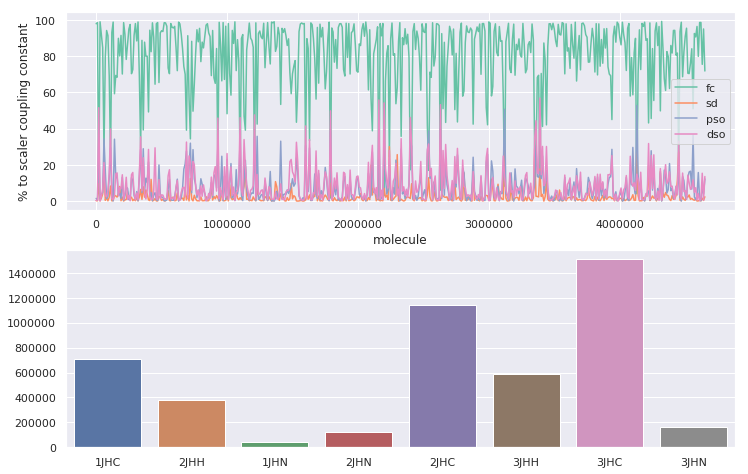

In [25]:
fig, ax = plt.subplots(2,1, figsize=(12, 8))
ax = ax.flatten()

# proportions of fc, sd, pso, dso in scaler-coupling constant
fc = scalar_coupling_contributions_df['fc']
sd = scalar_coupling_contributions_df['sd']
pso = scalar_coupling_contributions_df['pso']
dso = scalar_coupling_contributions_df['dso']

columns = ['fc', 'sd', 'pso', 'dso']
contribution_colors = sns.color_palette("Set2", 4)
nrows = scalar_coupling_contributions_df.shape[0]

for i, c in enumerate(columns):
    contributions = 100 * scalar_coupling_contributions_df[c].abs() \
                / (np.abs(fc) + np.abs(sd) + np.abs(pso) + np.abs(dso))
    ax[0].plot(np.arange(0, nrows, subsample*100), contributions[::subsample*100], c=contribution_colors[i], label=c)
    
ax[0].set_xlabel('molecule')
ax[0].set_ylabel('% to scaler coupling constant')
ax[0].legend()

# unique counts of molecular type
counts = np.zeros(scalar_coupling_contributions_df['type'].nunique())
for i, u in enumerate(scalar_coupling_contributions_df['type'].unique()):
    counts[i] = np.sum(scalar_coupling_contributions_df['type'].values == u)
    
sns.barplot(x=scalar_coupling_contributions_df['type'].unique(), y=counts, ax=ax[1])

From the top panel we can know that our target, scaler coupling constant, is in most cases determined by the Fermi Contact, which tells us about an interaction between an electron and an atomic nucleus. 

From the bottom panel we can see that the type of coupling is not uniformly distributed. We have **pretty much data about 3JHC, 2JHC, and 1JHC** but **limited amount for 1JHN, 2JHN, and 3JHN**. 

Let's see if these types of molecules are related to the values of interactions (fc, sd, pso, & dso). The following snipets were suggested by [Dmitrii Borkin](https://www.kaggle.com/hedgehoginfog). Thanks a lot!

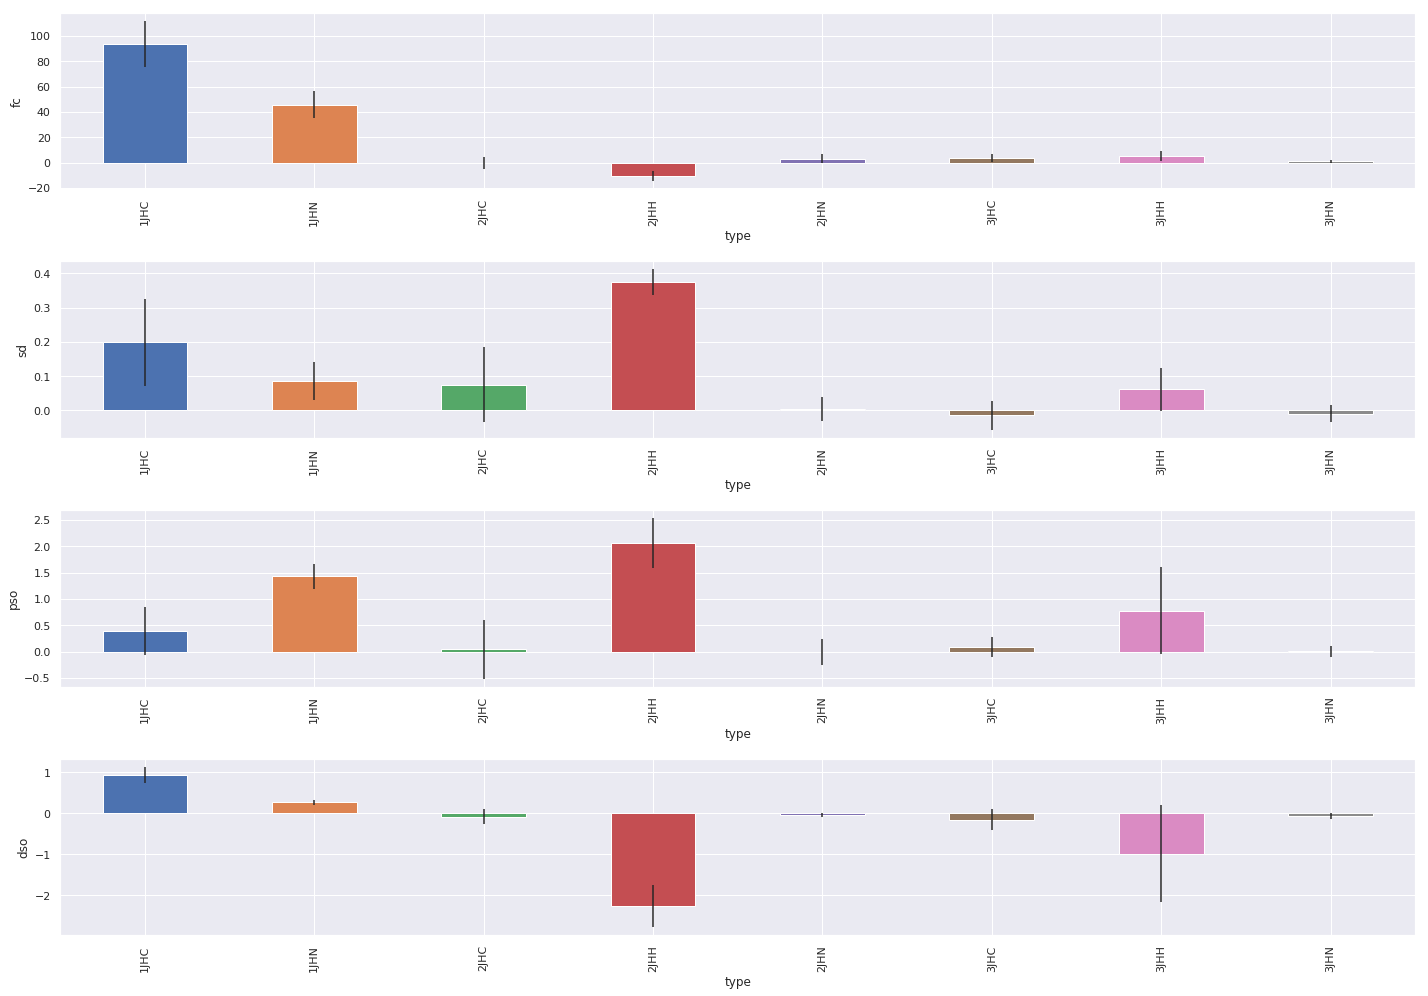

In [26]:
# Values of each interaction vs molecular types  
fig, ax = plt.subplots(4, 1, figsize=(20, 14)) 
ax = ax.flatten()
for i, col in enumerate(columns): 
    means = scalar_coupling_contributions_df[["type", col]].groupby(by='type')[col].mean()
    SDs = scalar_coupling_contributions_df[["type", col]].groupby(by='type')[col].std() 
    means.plot(kind="bar", yerr=SDs, ax=ax[i])
    ax[i].set_ylabel(col)
    
plt.tight_layout()

Interesting, **values of each interaction type varies a lot across molecular types**. For example, the molecular type 2JHH gives rise to predominantly positive values of sd (the spin-dipolar interaction) and pso (the paramagnetic spin-orbit interaction) but negative values of fc (the Fermi contact interaction) and dso (the diamagnetic spin-orbit interaction).

# Combine all the files into one
It seems possible to combine all the additional files as one. Such a big file may be useful for our feature engineering.

Note that 

**"dipole_moments" and "potential_energy"** files are about **molecule**.

**"magnetic_shielding_tensor", "mulliken_charge", and "structure"** files are about **an atom in a molecule**. Don't forget that only "structure" contains data for both train and test. 

**"scalar_coupling_contributions"** file is about **"a pair of atoms in a molecule"**.

So we got to be careful not to loose infomration when combining these files.

In [27]:
# combine "dipole_moments_df" and "potential_energy_df" (The both have 85003 rows, information per molecule)
DM_PE_df = pd.merge(dipole_moments_df, potential_energy_df, on='molecule_name')

del dipole_moments_df, potential_energy_df, train_df, test_df
gc.collect()

print("There are {} rows and {} columns in DM_PE_df.".format(DM_PE_df.shape[0], DM_PE_df.shape[1]))
DM_PE_df.head(12)

There are 85003 rows and 8 columns in DM_PE_df.


,molecule_name,X,Y,Z,dm_distance,dm_outliers,potential_energy,energy_class
0,dsgdb9nsd_000001,0.0000,0.0000,0.0000,0.000000,0,-40.52368,1
1,dsgdb9nsd_000002,-0.0002,0.0000,1.6256,2.642575,0,-56.56025,1
2,dsgdb9nsd_000003,0.0000,0.0000,-1.8511,3.426571,0,-76.42608,1
3,dsgdb9nsd_000005,0.0000,0.0000,-2.8937,8.373500,0,-93.42849,1
4,dsgdb9nsd_000007,0.0000,0.0000,0.0000,0.000000,0,-79.83869,1
5,dsgdb9nsd_000008,0.6506,-1.3801,-0.0002,2.327956,0,-115.73030,1
6,dsgdb9nsd_000009,0.7156,0.0004,-0.0004,0.512084,0,-116.66500,1
7,dsgdb9nsd_000010,3.8266,0.0000,-0.0001,14.642868,0,-132.76340,1
8,dsgdb9nsd_000011,2.3605,1.0119,0.0004,6.595902,0,-153.84300,1
9,dsgdb9nsd_000012,-3.6612,0.7058,0.0009,13.902540,0,-169.90610,1


In [28]:
# combine "magnetic_shielding_tensors_df" and "mulliken_charges_df" (The both have 1533537 rows, information per atom in a molecule)
MST_MC_df = pd.merge(magnetic_shielding_tensors_df, mulliken_charges_df, on=['molecule_name', 'atom_index'])

del magnetic_shielding_tensors_df, mulliken_charges_df
gc.collect()

print("There are {} rows and {} columns in DM_PE_df.".format(MST_MC_df.shape[0], MST_MC_df.shape[1]))
MST_MC_df.head(12)

There are 1533537 rows and 12 columns in DM_PE_df.


,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ,mulliken_charge
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170,-0.535689
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,0.133921
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,0.133922
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,0.133923
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013,0.133923
5,dsgdb9nsd_000002,0,275.6350,0.0003,0.0133,0.0003,275.6360,-0.0003,0.0161,-0.0004,237.4970,-0.707143
6,dsgdb9nsd_000002,1,31.2593,5.6126,-2.1025,5.6136,37.4364,-3.5567,-2.4461,-4.1372,27.9884,0.235712
7,dsgdb9nsd_000002,2,31.0341,-5.4827,-2.0299,-5.4837,37.6618,3.5987,-2.3616,4.1861,27.9885,0.235712
8,dsgdb9nsd_000002,3,40.7507,-0.1300,4.1318,-0.1300,27.9413,-0.0419,4.8083,-0.0488,27.9889,0.235720
9,dsgdb9nsd_000003,0,310.0960,0.0000,0.0000,0.0000,355.7730,0.0000,0.0000,0.0000,324.1550,-0.589706


In [29]:
# combine these two
MST_MC_DM_PE_df = pd.merge(MST_MC_df, DM_PE_df, on='molecule_name', how='left')

del MST_MC_df, DM_PE_df
gc.collect()

print("There are {} rows and {} columns in DM_PE_df.".format(MST_MC_DM_PE_df.shape[0], MST_MC_DM_PE_df.shape[1]))
MST_MC_DM_PE_df.head(12)

There are 1533537 rows and 19 columns in DM_PE_df.


,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ,mulliken_charge,X,Y,Z,dm_distance,dm_outliers,potential_energy,energy_class
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170,-0.535689,0.0000,0.0,0.0000,0.000000,0,-40.52368,1
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,0.133921,0.0000,0.0,0.0000,0.000000,0,-40.52368,1
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,0.133922,0.0000,0.0,0.0000,0.000000,0,-40.52368,1
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,0.133923,0.0000,0.0,0.0000,0.000000,0,-40.52368,1
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013,0.133923,0.0000,0.0,0.0000,0.000000,0,-40.52368,1
5,dsgdb9nsd_000002,0,275.6350,0.0003,0.0133,0.0003,275.6360,-0.0003,0.0161,-0.0004,237.4970,-0.707143,-0.0002,0.0,1.6256,2.642575,0,-56.56025,1
6,dsgdb9nsd_000002,1,31.2593,5.6126,-2.1025,5.6136,37.4364,-3.5567,-2.4461,-4.1372,27.9884,0.235712,-0.0002,0.0,1.6256,2.642575,0,-56.56025,1
7,dsgdb9nsd_000002,2,31.0341,-5.4827,-2.0299,-5.4837,37.6618,3.5987,-2.3616,4.1861,27.9885,0.235712,-0.0002,0.0,1.6256,2.642575,0,-56.56025,1
8,dsgdb9nsd_000002,3,40.7507,-0.1300,4.1318,-0.1300,27.9413,-0.0419,4.8083,-0.0488,27.9889,0.235720,-0.0002,0.0,1.6256,2.642575,0,-56.56025,1
9,dsgdb9nsd_000003,0,310.0960,0.0000,0.0000,0.0000,355.7730,0.0000,0.0000,0.0000,324.1550,-0.589706,0.0000,0.0,-1.8511,3.426571,0,-76.42608,1


### reduce memory burden
Thanks to https://www.kaggle.com/speedwagon/permutation-importance

In [30]:
# lighter structure
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                c_prec = df[col].apply(lambda x: np.finfo(x).precision).max()
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max and c_prec == np.finfo(np.float16).precision:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max and c_prec == np.finfo(np.float32).precision:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [31]:
MST_MC_DM_PE_df = reduce_mem_usage(MST_MC_DM_PE_df)
scalar_coupling_contributions_df = reduce_mem_usage(scalar_coupling_contributions_df)

Mem. usage decreased to 203.29 Mb (13.1% reduction)
Mem. usage decreased to 222.12 Mb (21.9% reduction)


In [32]:
# combine it with "scaler_coupling_contributions_df" (information per a pair of atoms in a molecule)
combined_df0 = pd.merge(scalar_coupling_contributions_df, MST_MC_DM_PE_df, 
                           left_on=['molecule_name','atom_index_0'], right_on=['molecule_name','atom_index'], how='left')
print("There are {} rows and {} columns in combined_df0.".format(combined_df0.shape[0], combined_df0.shape[1]))
combined_df0.head(12)

There are 4658147 rows and 26 columns in combined_df0.


,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ,mulliken_charge,X,Y,Z,dm_distance,dm_outliers,potential_energy,energy_class
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,0.133921,0.0000,0.0,0.0000,0.000000,0,-40.52368,1
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,0.133921,0.0000,0.0,0.0000,0.000000,0,-40.52368,1
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,0.133921,0.0000,0.0,0.0000,0.000000,0,-40.52368,1
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,0.133921,0.0000,0.0,0.0000,0.000000,0,-40.52368,1
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,0.133922,0.0000,0.0,0.0000,0.000000,0,-40.52368,1
5,dsgdb9nsd_000001,2,3,2JHH,-11.0317,0.352932,2.85856,-3.433950,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,0.133922,0.0000,0.0,0.0000,0.000000,0,-40.52368,1
6,dsgdb9nsd_000001,2,4,2JHH,-11.0324,0.352943,2.85853,-3.433870,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,0.133922,0.0000,0.0,0.0000,0.000000,0,-40.52368,1
7,dsgdb9nsd_000001,3,0,1JHC,83.0241,0.254634,1.25856,0.272012,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,0.133923,0.0000,0.0,0.0000,0.000000,0,-40.52368,1
8,dsgdb9nsd_000001,3,4,2JHH,-11.0319,0.352943,2.85856,-3.433930,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,0.133923,0.0000,0.0,0.0000,0.000000,0,-40.52368,1
9,dsgdb9nsd_000001,4,0,1JHC,83.0243,0.254628,1.25856,0.272012,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013,0.133923,0.0000,0.0,0.0000,0.000000,0,-40.52368,1


Here the combined file is based on "atom_index_0", but of course you can do the same using "atom_index_1" like the following. You can even concatenate these two big files together to have a complete information about a pair of molecules. But I could not manage due to the memory limit of this kernel. 

In [33]:
# # combine it with "scaler_coupling_contributions_df" (information per a pair of atoms in a molecule)
# combined_df1 = pd.merge(scalar_coupling_contributions_df, MST_MC_DM_PE_df, 
#                            left_on=['molecule_name','atom_index_1'], right_on=['molecule_name','atom_index'], how='left')

# del scalar_coupling_contributions_df, MST_MC_DM_PE_df
# gc.collect()

# print("There are {} rows and {} columns in combined_df0.".format(combined_df1.shape[0], combined_df1.shape[1]))
# combined_df1.head(12)

In [34]:
# # combine these two
# combined_df = pd.merge(combined_df0, combined_df1, on=['molecule_name'])

# del combined_df0, combined_df1
# gc.collect()

# print("There are {} rows and {} columns in combined_df.".format(combined_df.shape[0], combined_df.shape[1]))
# combined_df.head(12)

TO BE UPDATED...